       fsw  du/dt    ncap  ncapCy   raEmi  nChip  Achip
0     22.0   10.0  150.73   26.61  0.0259  40.79   35.0
1     35.0    7.0   85.11    6.88  0.0408  23.12   31.0
2     36.0   29.0   90.34   22.22  0.0515  17.42   22.0
3     47.0    6.0   91.75    9.40  0.0207  49.14   28.0
4     21.0   25.0   81.91   20.12  0.0222  32.09   34.0
...    ...    ...     ...     ...     ...    ...    ...
1817  34.0    8.0   75.58   13.22  0.0537  27.48   31.0
1818  38.0   25.0  129.17   18.37  0.0536  32.06   32.0
1819  47.0   30.0   87.42    9.54  0.0321  36.34   26.0
1820   5.0    6.0  101.29   27.11  0.0180  46.47   31.0
1821  22.0    7.0   75.49   18.58  0.0586  32.95   20.0

[1822 rows x 7 columns]
      Powerdensity  Efficiency       Cost
0           7.1965     88.6763  4889.0566
1          12.4340     86.2358  2756.3057
2          11.7429     95.3116  2406.8088
3          11.3518     75.6239  3821.6604
4          12.7590     93.2826  3210.3469
...            ...         ...        ...
1817     

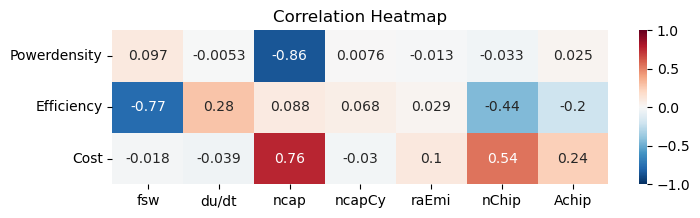

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.io
import os

mat_data = scipy.io.loadmat('C:/Users/D3H8678/Dr. Ing. h.c. F. Porsche AG/Team Elektra - Studenten - General/Alkafahje/' \
                            '03 Server_Store/Master_Thesis/Data Science/ANN_Training/Data_Scaled/' \
                          '3000_scaled_overall_nochoke_Nizn_overall_2LVL_nocycle_data.mat')
#mat_data = scipy.io.loadmat('C:/Users/D3H8678/Dr. Ing. h.c. F. Porsche AG/Team Elektra - Studenten - General/Alkafahje/' \
#                            '03 Server_Store/Master_Thesis/mooinverter/TestFolder/MOO/inverter/ANN_Training/Data_Scaled/' \
#                           '3000_z_score_overall_data.mat')

#Get scaled input and scaled output data
input_data = mat_data.get('input') #(4500000, 8)
output = mat_data.get('output') #(4500000, 4)
input_scaled = mat_data.get('input_scaled') #(4500000, 8)
output_scaled = mat_data.get('output_scaled') #(4500000, 4)

#input_scaled = mat_data.get('input_standardized') #(4500000, 8)
#output_scaled = mat_data.get('output_standardized') #(4500000, 4)


# Define the column names for input and output
input_column_names = ['fsw', 'du/dt', 'ncap', 'ncapCy', 'raEmi', 'nChip', 'Achip']
output_column_names = ['Powerdensity', 'Efficiency', 'Cost']  # Adjust the output column names as needed

# Create dataframes from the input and output data
input_df = pd.DataFrame(input_data[0:1822, :-1], columns=input_column_names)
output_df = pd.DataFrame(output[0:1822:, :-1], columns=output_column_names)

print(input_df)
print(output_df)
'''
# Iterate over each input variable
for input_var in input_column_names:
    # Iterate over each output variable
    for output_var in output_column_names:
        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(input_df[input_var], output_df[output_var], s=5)
        plt.xlabel(input_var)
        plt.ylabel(output_var)
        plt.title(f'{input_var} vs {output_var}')
        plt.show()
'''
# Concatenate input and output dataframes
df = pd.concat([input_df, output_df], axis=1)

# Compute correlation matrix
corr_matrix = df.corr()

# Set the threshold value
threshold = 0

# Filter the correlation matrix
filtered_corr_df = corr_matrix[input_column_names].loc[output_column_names]

# Create the heatmap
plt.figure(figsize=(8, 2))
sn.heatmap(filtered_corr_df, annot=True, cmap="RdBu_r", center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
